In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
# Generate a sample dataset for demonstration
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-03-31', freq='D')
df = pd.DataFrame(date_rng, columns=['timestamp'])
df['equipment_health'] = np.random.randint(0, 2, size=(len(date_rng)))


In [24]:
df

,timestamp,equipment_health,scaled_health
0,2023-01-01,0,0.0
1,2023-01-02,1,1.0
2,2023-01-03,0,0.0
3,2023-01-04,0,0.0
4,2023-01-05,0,0.0
...,...,...,...
85,2023-03-27,0,0.0
86,2023-03-28,1,1.0
87,2023-03-29,0,0.0
88,2023-03-30,1,1.0


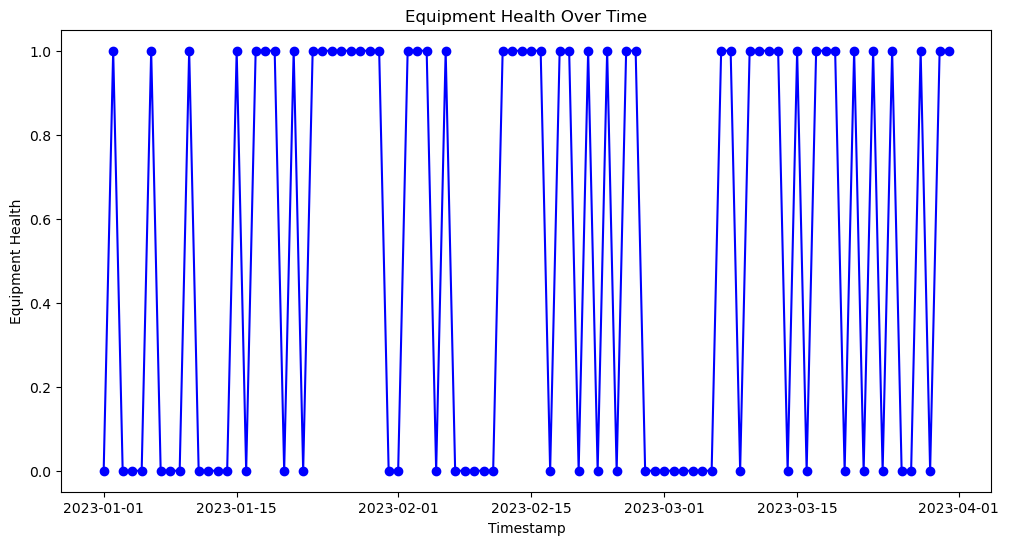

In [15]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['equipment_health'], marker='o', linestyle='-', color='b')
plt.title('Equipment Health Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Equipment Health')
plt.show()

In [16]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_health'] = scaler.fit_transform(df['equipment_health'].values.reshape(-1, 1))


In [17]:
# Create sequences for LSTM training
sequence_length = 10  # Adjust based on your data characteristics
sequences = []
for i in range(len(df) - sequence_length):
    seq = df['scaled_health'].values[i:i + sequence_length]
    label = df['scaled_health'].values[i + sequence_length]
    sequences.append((seq, label))


In [18]:
# Convert the sequences to NumPy arrays
X, y = zip(*sequences)
X = np.array(X)
y = np.array(y)


In [19]:
# Reshape X for input to LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [21]:
# Train the model
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
3/3 [==============================] - 7s 17ms/step - loss: 0.6258
Epoch 2/50
3/3 [==============================] - 0s 14ms/step - loss: 0.5867
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.5525
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 0.5170
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.4810
Epoch 6/50
3/3 [==============================] - 0s 13ms/step - loss: 0.4489
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 0.4145
Epoch 8/50
3/3 [==============================] - 0s 14ms/step - loss: 0.3804
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 0.3459
Epoch 10/50
3/3 [==============================] - 0s 13ms/step - loss: 0.3094
Epoch 11/50
3/3 [==============================] - 0s 13ms/step - loss: 0.2765
Epoch 12/50
3/3 [==============================] - 0s 13ms/step - loss: 0.2551
Epoch 13/50
3/3 [==============================] - 0s 13ms/st

KeyError: 'predicted_health'

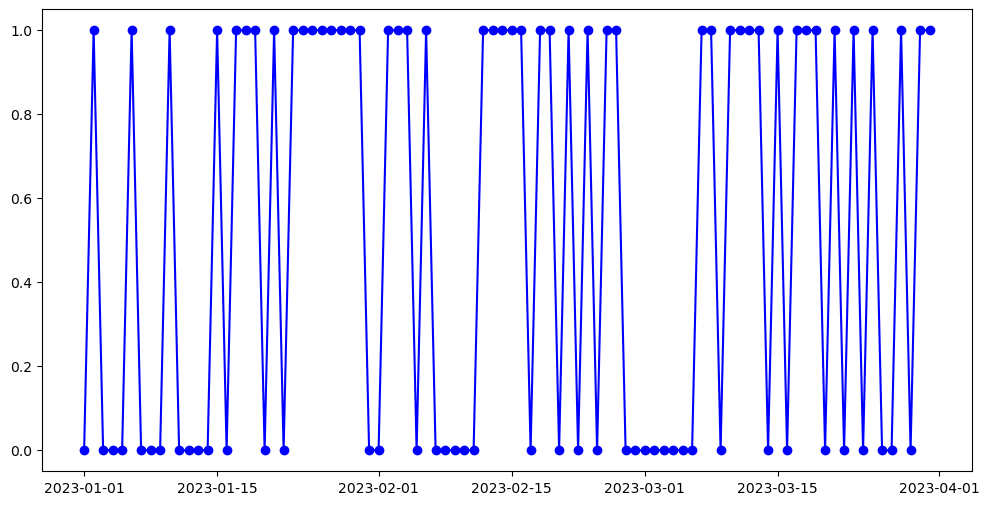

In [23]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['equipment_health'], marker='o', linestyle='-', color='b', label='Actual Health')
plt.plot(df['timestamp'][sequence_length:], df['predicted_health'][sequence_length:], marker='o', linestyle='-', color='r', label='Predicted Health')
plt.title('Equipment Health Prediction with LSTM')
plt.xlabel('Timestamp')
plt.ylabel('Equipment Health')
plt.legend()
plt.show()